# Decision Trees

In [51]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.5.1'

In [52]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [53]:
from pathlib import Path

figures_folder = Path("../Figures")

## Training and Visualizing a Decision Tree

In [54]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris(as_frame=True)
features = ["petal length (cm)", "petal width (cm)"]
X = iris_data.data[features].values
y = iris_data.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

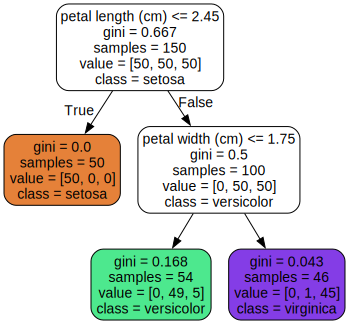

In [55]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
	tree_clf,
	out_file="../Figures/iris_tree.dot",
	feature_names=features,
	class_names=iris_data.target_names,
	rounded=True,
	filled=True
)

Source.from_file("../Figures/iris_tree.dot")

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary_2(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
	x1s = np.linspace(axes[0], axes[1], 100)
	x2s = np.linspace(axes[2], axes[3], 100)
	x1, x2 = np.meshgrid(x1s, x2s)
	X_new = np.c_[x1.ravel(), x2.ravel()]
	y_pred = clf.predict(X_new).reshape(x1.shape)
	custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
	plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
	if not plot_training:
		return
	plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
	plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
	plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
	plt.axis(axes)
	plt.xlabel("Petal length", fontsize=14)
	plt.ylabel("Petal width", fontsize=14)
	if legend:
		plt.legend(loc="upper left", fontsize=14)

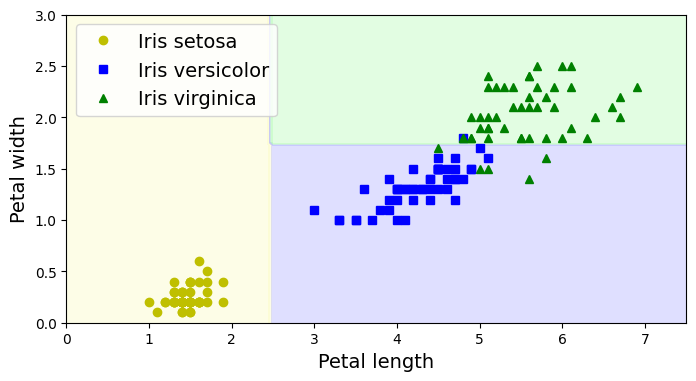

In [56]:
plt.figure(figsize=(8, 4))
plot_decision_boundary_2(tree_clf, X, y, legend=True)

## Estimating Class Probabilities

In [58]:
new_flower = [[5, 1.5]]
probas = tree_clf.predict_proba(new_flower)
print(probas)
print(iris_data.target_names)
print(iris_data.target_names[tree_clf.predict(new_flower)])

[[0.         0.90740741 0.09259259]]
['setosa' 'versicolor' 'virginica']
['versicolor']


## The CART Training Algorithm

CART algotithm uses the following cost function to split the dataset:

\begin{equation}
J(k, t_k) = \frac{m_{\text{left}}}{m} G_{\text{left}} + \frac{m_{\text{right}}}{m} G_{\text{right}}
\end{equation}

where:

- $G_{\text{left/right}}$ measures the impurity of the left/right subset
- $m_{\text{left/right}}$ is the number of instances in the left/right subset

## Regularization Hyperparameters

In [59]:
# Using moons dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=5000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf_reg = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_more_reg = DecisionTreeClassifier(max_depth=2, random_state=42)

tree_clf.fit(X_train, y_train)
tree_clf_reg.fit(X_train, y_train)
tree_clf_more_reg.fit(X_train, y_train)

tree_clf.score(X_test, y_test), tree_clf_reg.score(X_test, y_test), tree_clf_more_reg.score(X_test, y_test)

(0.879, 0.911, 0.909)

## Regression

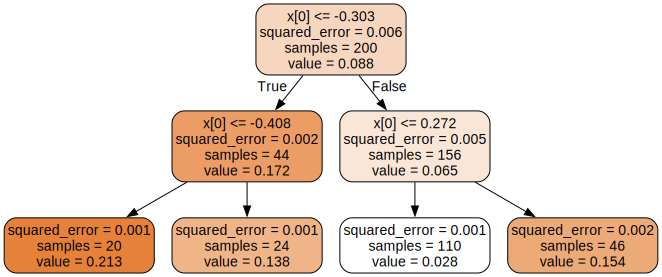

In [60]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad**2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

export_graphviz(
	tree_reg,
	out_file="../Figures/quad_tree.dot",
	rounded=True,
	filled=True
)

Source.from_file("../Figures/quad_tree.dot")

In [61]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [62]:
tree_reg.tree_.threshold, tree_reg2.tree_.threshold

(array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
        -2.        , -2.        ]),
 array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
        -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
        -2.        , -2.        ,  0.40399227, -2.        , -2.        ]))

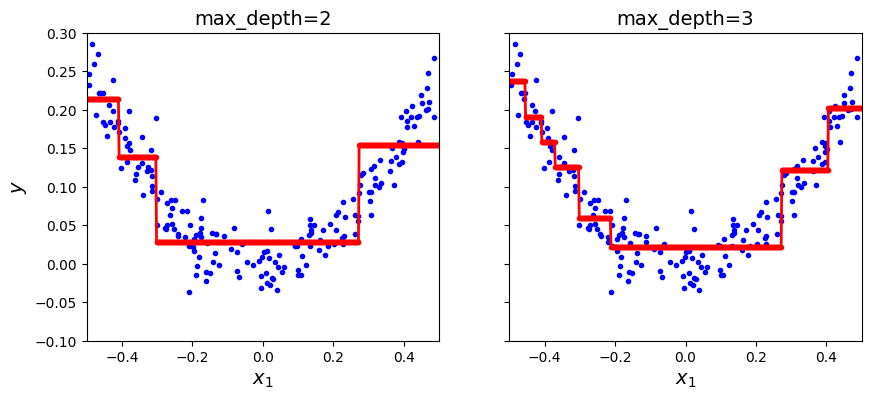

In [63]:
def plot_tree_preds(tree_reg, X, y, axes=[-0.5, 0.5, -0.1, 0.3]):
	x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
	y_pred = tree_reg.predict(x1)
	plt.axis(axes)
	plt.xlabel("$x_1$", fontsize=14)
	plt.plot(X, y, "b.")
	plt.plot(x1, y_pred, "r.-", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_tree_preds(tree_reg, X_quad, y_quad)
plt.title("max_depth=2")
plt.ylabel("$y$")
plt.sca(axes[1])
plot_tree_preds(tree_reg2, X_quad, y_quad)
plt.title("max_depth=3")

plt.show()

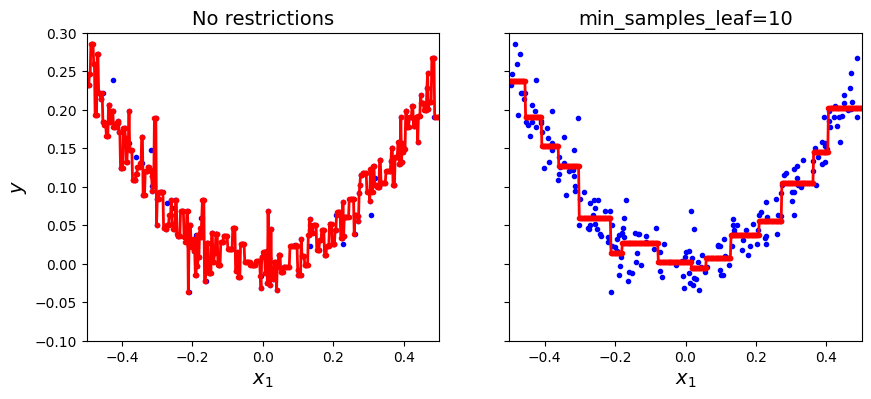

In [64]:
unreg_tree = DecisionTreeRegressor(random_state=42)
reg_tree = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

unreg_tree.fit(X_quad, y_quad)
reg_tree.fit(X_quad, y_quad)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_tree_preds(unreg_tree, X_quad, y_quad)
plt.title("No restrictions")
plt.ylabel("$y$")
plt.sca(axes[1])
plot_tree_preds(reg_tree, X_quad, y_quad)
plt.title("min_samples_leaf=10")

plt.show()

## Sensitivity to Axis Orientation

In [66]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")

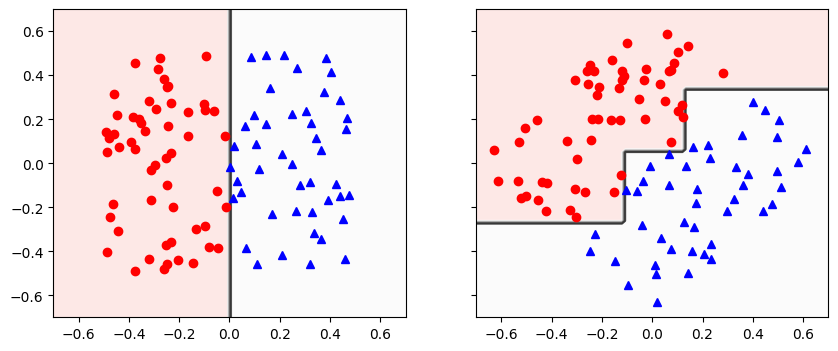

In [67]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")
plt.show()

In [82]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

X_iris, y_iris = iris_data.data[features].values, iris_data.target

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)

tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

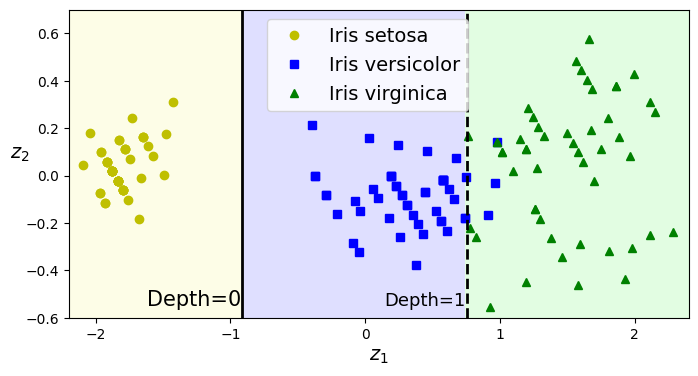

In [83]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))

X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris_data.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))